# Sun path diagram

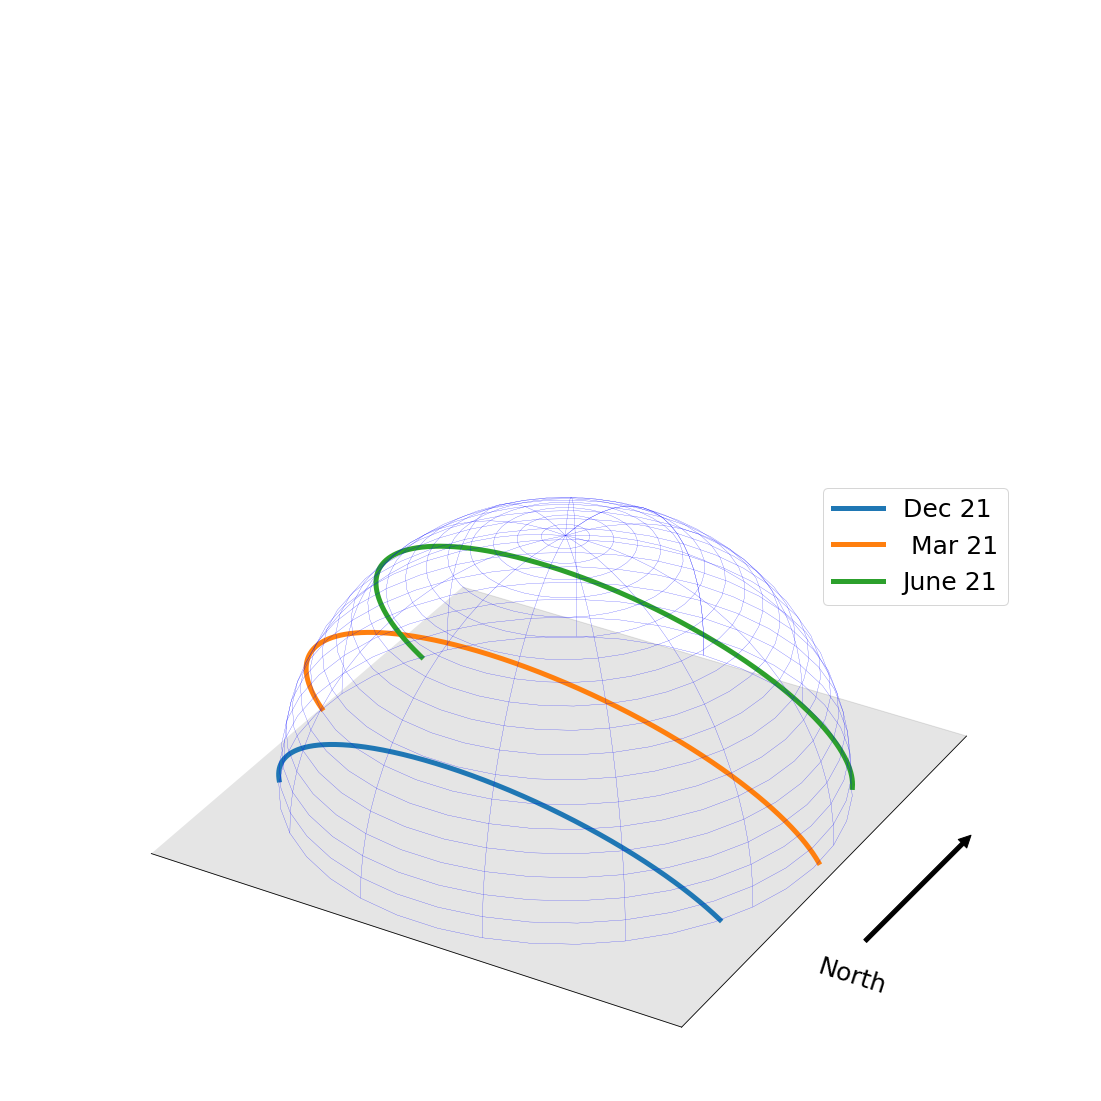

In [5]:
import math
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from scipy.interpolate import spline

n = range(1,366)
deltas = [math.asin(-math.sin(math.radians(23.45)) * math.cos(math.radians(360*(item +10)/365.25))) for item in n]  # Solar declination, a function of day of the year
lamda = math.radians(33+55/60)  # Latitude in rad; this is for Los Angeles
omegas = [math.radians(item) for item in (np.arange(0,24,0.01) -12) * 15] # Hour angle. 2400 data points for a day.

# Initialize lists to store results
altitude_angles = []
azimuth_angles  = []
zenith_angles = []
sun_hours = []

for delta in deltas: # For every day in the year
    temp1 = []
    temp2 = []
    temp3 = []
    omega_ss = math.acos(-math.tan(lamda) * math.tan(delta))
    sun_hours.append((np.array(omegas) < omega_ss) &  (np.array(omegas) > -omega_ss))
    for omega in omegas:
        zenith = math.acos(math.cos(lamda)*math.cos(delta)*math.cos(omega) + math.sin(lamda) * math.sin(delta))
        temp3.append(zenith)
        azimuth = math.asin(math.cos(delta)*math.sin(omega)/math.sin(zenith))
        altitude_angle = math.radians(90) - zenith
        temp1.append(altitude_angle)
        temp2.append(azimuth)   
    max_index = temp2.index(max(temp2))
    min_index = temp2.index(min(temp2))
    temp2 = np.array(temp2)
    temp2[max_index+1:] = math.radians(180) - temp2[max_index+1:]  # Manually revise the azimuth angle to fix the sign issue when performing inverse trigonometric 
    temp2[:min_index] = math.radians(-180) - temp2[:min_index] # Manually revise the azimuth angle to fix the sign issue when performing inverse trigonometric 
    
        
    altitude_angles.append(temp1)  # Results vector for altitude angles 
    azimuth_angles.append(temp2)  # Results vector for altitude angles 
    zenith_angles.append(temp3)  # Results vector for altitude angles 

    
# Plot the diagram

results = []
fig = plt.figure(figsize = (30,20))
ax = fig.gca(projection='3d')

ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(0,1)

def set_axes_radius(ax, origin, radius):
    ax.set_xlim3d([origin[0] - radius, origin[0] + radius])
    ax.set_ylim3d([origin[1] - radius, origin[1] + radius])
    ax.set_zlim3d(0,  2*radius)

def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d(),
    ])

    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    set_axes_radius(ax, origin, radius)

    

select_dates = [355,80, 173]  # These dates represents winter solstice, spring  equinox, and summer solstice respectively 
sdfs = []
for date in select_dates:
    results = []
    for i, item in enumerate(altitude_angles[date]):
        if item > 0:
            projection = math.cos(item)
            azimuth = azimuth_angles[date][i]
            z = math.sin(item)
            x = - projection * math.sin(azimuth)
            y = - projection * math.cos(azimuth)
            results.append([x,y,z])
    x = np.array(results).take(indices=0, axis=1)
    y = np.array(results).take(indices=1, axis=1)
    z = np.array(results).take(indices=2, axis=1)
    ax.plot(x, y, z, linewidth=5)

    sdfs.append([x,y,z])
ax.legend(['Dec 21', ' Mar 21', 'June 21'],loc = (0.75,0.45), fontsize = 25)

u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi/2:20j]
y = np.cos(u)*np.sin(v)
x = np.sin(u)*np.sin(v)
z = np.cos(v)


ax.plot_wireframe(x, y, z, color="b",linewidth = 0.2,rstride = 3)
ax.set_aspect('equal')         # important!

set_axes_equal(ax)   
ax.w_zaxis.line.set_lw(0.)

ax.set_zticks([])
ax.set_xticks([])
ax.set_yticks([])

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.10))



ax.view_init(30)
ax.annotate('', xy=(0.07, -0.05), xytext=(0.05, -0.07),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.text(1.3, -0.6, 0,'North', (1, 0, 0),fontsize = 25)
plt.show() 